In [1]:
import pickle
import os, sys, time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.table import Table
import math
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import PredefinedSplit


import sklearn
from sklearn.metrics import f1_score
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import lightgbm as lgb
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
import dask
import dask.dataframe as dd
import seaborn as sns

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
pd.options.mode.chained_assignment = None
font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        }


In [2]:
df1=pd.read_pickle('Sample1')
df2=pd.read_pickle('Sample2')
df3=pd.read_pickle('Sample3')
df4=pd.read_pickle('Sample4')
df5=pd.read_pickle('Sample5')
df1.reset_index(inplace=True)
df2.reset_index(inplace=True)
df3.reset_index(inplace=True)
df4.reset_index(inplace=True)
df5.reset_index(inplace=True)


In [5]:
col=["CFHT_ustar_MAG_APER3","UVISTA_Y_MAG_APER3", "UVISTA_J_MAG_APER3", "UVISTA_H_MAG_APER3", "UVISTA_Ks_MAG_APER3",
    "HSC_g_MAG_APER3", "HSC_r_MAG_APER3", "HSC_i_MAG_APER3", "HSC_z_MAG_APER3",
    "CFHT_ustar_FLUX_APER3","UVISTA_Y_FLUX_APER3", "UVISTA_J_FLUX_APER3", "UVISTA_H_FLUX_APER3", "UVISTA_Ks_FLUX_APER3",
    "HSC_g_FLUX_APER3", "HSC_r_FLUX_APER3", "HSC_i_FLUX_APER3", "HSC_z_FLUX_APER3",
     'U-Y','U-J','U-H','U-K','U-G','U-R','U-I','U-Z',
    'Y-J','Y-H','Y-K','Y-G','Y-R','Y-I','Y-Z',
    'J-H','J-K','J-G','J-R','J-I','J-Z',
    'H-K','H-G','H-R','H-I','H-Z',
    'K-G','K-R','K-I','K-Z',
    'G-R','G-I','G-Z',
    'R-I','R-Z',
    'I-Z'
]

In [7]:
df1['U-V']=df1["CFHT_ustar_MAG_APER3"]-df1["SC_V_MAG_APER3"]
df1['U-Y']=df1["CFHT_ustar_MAG_APER3"]-df1["UVISTA_Y_MAG_APER3"]
df1['U-J']=df1["CFHT_ustar_MAG_APER3"]-df1["UVISTA_J_MAG_APER3"]
df1['U-H']=df1["CFHT_ustar_MAG_APER3"]-df1["UVISTA_H_MAG_APER3"]
df1['U-K']=df1["CFHT_ustar_MAG_APER3"]-df1["UVISTA_Ks_MAG_APER3"]
df1['U-G']=df1["CFHT_ustar_MAG_APER3"]-df1["HSC_g_MAG_APER3"]
df1['U-R']=df1["CFHT_ustar_MAG_APER3"]-df1["HSC_r_MAG_APER3"]
df1['U-I']=df1["CFHT_ustar_MAG_APER3"]-df1["HSC_i_MAG_APER3"]
df1['U-Z']=df1["CFHT_ustar_MAG_APER3"]-df1["HSC_z_MAG_APER3"]
df1['U-B']=df1["CFHT_ustar_MAG_APER3"]-df1["SC_B_MAG_APER3"]


df1['V-Y']=df1["SC_V_MAG_APER3"]-df1["UVISTA_Y_MAG_APER3"]
df1['V-J']=df1["SC_V_MAG_APER3"]-df1["UVISTA_J_MAG_APER3"]
df1['V-H']=df1["SC_V_MAG_APER3"]-df1["UVISTA_H_MAG_APER3"]
df1['V-K']=df1["SC_V_MAG_APER3"]-df1["UVISTA_Ks_MAG_APER3"]
df1['V-G']=df1["SC_V_MAG_APER3"]-df1["HSC_g_MAG_APER3"]
df1['V-R']=df1["SC_V_MAG_APER3"]-df1["HSC_r_MAG_APER3"]
df1['V-I']=df1["SC_V_MAG_APER3"]-df1["HSC_i_MAG_APER3"]
df1['V-Z']=df1["SC_V_MAG_APER3"]-df1["HSC_z_MAG_APER3"]
df1['V-B']=df1["SC_V_MAG_APER3"]-df1["SC_B_MAG_APER3"]

df1['Y-J']=df1["UVISTA_Y_MAG_APER3"]-df1["UVISTA_J_MAG_APER3"]
df1['Y-H']=df1["UVISTA_Y_MAG_APER3"]-df1["UVISTA_H_MAG_APER3"]
df1['Y-K']=df1["UVISTA_Y_MAG_APER3"]-df1["UVISTA_Ks_MAG_APER3"]
df1['Y-G']=df1["UVISTA_Y_MAG_APER3"]-df1["HSC_g_MAG_APER3"]
df1['Y-R']=df1["UVISTA_Y_MAG_APER3"]-df1["HSC_r_MAG_APER3"]
df1['Y-I']=df1["UVISTA_Y_MAG_APER3"]-df1["HSC_i_MAG_APER3"]
df1['Y-Z']=df1["UVISTA_Y_MAG_APER3"]-df1["HSC_z_MAG_APER3"]
df1['Y-B']=df1["UVISTA_Y_MAG_APER3"]-df1["SC_B_MAG_APER3"]


df1['J-H']=df1["UVISTA_J_MAG_APER3"]-df1["UVISTA_H_MAG_APER3"]
df1['J-K']=df1["UVISTA_J_MAG_APER3"]-df1["UVISTA_Ks_MAG_APER3"]
df1['J-G']=df1["UVISTA_J_MAG_APER3"]-df1["HSC_g_MAG_APER3"]
df1['J-R']=df1["UVISTA_J_MAG_APER3"]-df1["HSC_r_MAG_APER3"]
df1['J-I']=df1["UVISTA_J_MAG_APER3"]-df1["HSC_i_MAG_APER3"]
df1['J-Z']=df1["UVISTA_J_MAG_APER3"]-df1["HSC_z_MAG_APER3"]
df1['J-B']=df1["UVISTA_J_MAG_APER3"]-df1["SC_B_MAG_APER3"]


df1['H-K']=df1["UVISTA_H_MAG_APER3"]-df1["UVISTA_Ks_MAG_APER3"]
df1['H-G']=df1["UVISTA_H_MAG_APER3"]-df1["HSC_g_MAG_APER3"]
df1['H-R']=df1["UVISTA_H_MAG_APER3"]-df1["HSC_r_MAG_APER3"]
df1['H-I']=df1["UVISTA_H_MAG_APER3"]-df1["HSC_i_MAG_APER3"]
df1['H-Z']=df1["UVISTA_H_MAG_APER3"]-df1["HSC_z_MAG_APER3"]
df1['H-B']=df1["UVISTA_H_MAG_APER3"]-df1["SC_B_MAG_APER3"]


df1['K-G']=df1["UVISTA_Ks_MAG_APER3"]-df1["HSC_g_MAG_APER3"]
df1['K-R']=df1["UVISTA_Ks_MAG_APER3"]-df1["HSC_r_MAG_APER3"]
df1['K-I']=df1["UVISTA_Ks_MAG_APER3"]-df1["HSC_i_MAG_APER3"]
df1['K-Z']=df1["UVISTA_Ks_MAG_APER3"]-df1["HSC_z_MAG_APER3"]
df1['K-B']=df1["UVISTA_Ks_MAG_APER3"]-df1["SC_B_MAG_APER3"]


df1['G-R']=df1["HSC_g_MAG_APER3"]-df1["HSC_r_MAG_APER3"]
df1['G-I']=df1["HSC_g_MAG_APER3"]-df1["HSC_i_MAG_APER3"]
df1['G-Z']=df1['HSC_g_MAG_APER3']-df1["HSC_z_MAG_APER3"]
df1['G-B']=df1['HSC_g_MAG_APER3']-df1["SC_B_MAG_APER3"]


df1['R-I']=df1["HSC_r_MAG_APER3"]-df1["HSC_i_MAG_APER3"]
df1['R-Z']=df1["HSC_r_MAG_APER3"]-df1["HSC_z_MAG_APER3"]
df1['R-B']=df1["HSC_r_MAG_APER3"]-df1["SC_B_MAG_APER3"]


df1['I-Z']=df1["HSC_i_MAG_APER3"]-df1["HSC_z_MAG_APER3"]
df1['I-B']=df1["HSC_i_MAG_APER3"]-df1["SC_B_MAG_APER3"]

df1['Z-B']=df1["HSC_z_MAG_APER3"]-df1["SC_B_MAG_APER3"]


C:\Users\afons\AppData\Local\Temp\ipykernel_34712\1101058323.py:39: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df1['J-B']=df1["UVISTA_J_MAG_APER3"]-df1["SC_B_MAG_APER3"]
C:\Users\afons\AppData\Local\Temp\ipykernel_34712\1101058323.py:42: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df1['H-K']=df1["UVISTA_H_MAG_APER3"]-df1["UVISTA_Ks_MAG_APER3"]
C:\Users\afons\AppData\Local\Temp\ipykernel_34712\1101058323.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many time

In [9]:
df2['U-V']=df2["CFHT_ustar_MAG_APER3"]-df2["SC_V_MAG_APER3"]
df2['U-Y']=df2["CFHT_ustar_MAG_APER3"]-df2["UVISTA_Y_MAG_APER3"]
df2['U-J']=df2["CFHT_ustar_MAG_APER3"]-df2["UVISTA_J_MAG_APER3"]
df2['U-H']=df2["CFHT_ustar_MAG_APER3"]-df2["UVISTA_H_MAG_APER3"]
df2['U-K']=df2["CFHT_ustar_MAG_APER3"]-df2["UVISTA_Ks_MAG_APER3"]
df2['U-G']=df2["CFHT_ustar_MAG_APER3"]-df2["HSC_g_MAG_APER3"]
df2['U-R']=df2["CFHT_ustar_MAG_APER3"]-df2["HSC_r_MAG_APER3"]
df2['U-I']=df2["CFHT_ustar_MAG_APER3"]-df2["HSC_i_MAG_APER3"]
df2['U-Z']=df2["CFHT_ustar_MAG_APER3"]-df2["HSC_z_MAG_APER3"]
df2['U-B']=df2["CFHT_ustar_MAG_APER3"]-df2["SC_B_MAG_APER3"]


df2['V-Y']=df2["SC_V_MAG_APER3"]-df2["UVISTA_Y_MAG_APER3"]
df2['V-J']=df2["SC_V_MAG_APER3"]-df2["UVISTA_J_MAG_APER3"]
df2['V-H']=df2["SC_V_MAG_APER3"]-df2["UVISTA_H_MAG_APER3"]
df2['V-K']=df2["SC_V_MAG_APER3"]-df2["UVISTA_Ks_MAG_APER3"]
df2['V-G']=df2["SC_V_MAG_APER3"]-df2["HSC_g_MAG_APER3"]
df2['V-R']=df2["SC_V_MAG_APER3"]-df2["HSC_r_MAG_APER3"]
df2['V-I']=df2["SC_V_MAG_APER3"]-df2["HSC_i_MAG_APER3"]
df2['V-Z']=df2["SC_V_MAG_APER3"]-df2["HSC_z_MAG_APER3"]
df2['V-B']=df2["SC_V_MAG_APER3"]-df2["SC_B_MAG_APER3"]

df2['Y-J']=df2["UVISTA_Y_MAG_APER3"]-df2["UVISTA_J_MAG_APER3"]
df2['Y-H']=df2["UVISTA_Y_MAG_APER3"]-df2["UVISTA_H_MAG_APER3"]
df2['Y-K']=df2["UVISTA_Y_MAG_APER3"]-df2["UVISTA_Ks_MAG_APER3"]
df2['Y-G']=df2["UVISTA_Y_MAG_APER3"]-df2["HSC_g_MAG_APER3"]
df2['Y-R']=df2["UVISTA_Y_MAG_APER3"]-df2["HSC_r_MAG_APER3"]
df2['Y-I']=df2["UVISTA_Y_MAG_APER3"]-df2["HSC_i_MAG_APER3"]
df2['Y-Z']=df2["UVISTA_Y_MAG_APER3"]-df2["HSC_z_MAG_APER3"]
df2['Y-B']=df2["UVISTA_Y_MAG_APER3"]-df2["SC_B_MAG_APER3"]


df2['J-H']=df2["UVISTA_J_MAG_APER3"]-df2["UVISTA_H_MAG_APER3"]
df2['J-K']=df2["UVISTA_J_MAG_APER3"]-df2["UVISTA_Ks_MAG_APER3"]
df2['J-G']=df2["UVISTA_J_MAG_APER3"]-df2["HSC_g_MAG_APER3"]
df2['J-R']=df2["UVISTA_J_MAG_APER3"]-df2["HSC_r_MAG_APER3"]
df2['J-I']=df2["UVISTA_J_MAG_APER3"]-df2["HSC_i_MAG_APER3"]
df2['J-Z']=df2["UVISTA_J_MAG_APER3"]-df2["HSC_z_MAG_APER3"]
df2['J-B']=df2["UVISTA_J_MAG_APER3"]-df2["SC_B_MAG_APER3"]


df2['H-K']=df2["UVISTA_H_MAG_APER3"]-df2["UVISTA_Ks_MAG_APER3"]
df2['H-G']=df2["UVISTA_H_MAG_APER3"]-df2["HSC_g_MAG_APER3"]
df2['H-R']=df2["UVISTA_H_MAG_APER3"]-df2["HSC_r_MAG_APER3"]
df2['H-I']=df2["UVISTA_H_MAG_APER3"]-df2["HSC_i_MAG_APER3"]
df2['H-Z']=df2["UVISTA_H_MAG_APER3"]-df2["HSC_z_MAG_APER3"]
df2['H-B']=df2["UVISTA_H_MAG_APER3"]-df2["SC_B_MAG_APER3"]


df2['K-G']=df2["UVISTA_Ks_MAG_APER3"]-df2["HSC_g_MAG_APER3"]
df2['K-R']=df2["UVISTA_Ks_MAG_APER3"]-df2["HSC_r_MAG_APER3"]
df2['K-I']=df2["UVISTA_Ks_MAG_APER3"]-df2["HSC_i_MAG_APER3"]
df2['K-Z']=df2["UVISTA_Ks_MAG_APER3"]-df2["HSC_z_MAG_APER3"]
df2['K-B']=df2["UVISTA_Ks_MAG_APER3"]-df2["SC_B_MAG_APER3"]


df2['G-R']=df2["HSC_g_MAG_APER3"]-df2["HSC_r_MAG_APER3"]
df2['G-I']=df2["HSC_g_MAG_APER3"]-df2["HSC_i_MAG_APER3"]
df2['G-Z']=df2['HSC_g_MAG_APER3']-df2["HSC_z_MAG_APER3"]
df2['G-B']=df2['HSC_g_MAG_APER3']-df2["SC_B_MAG_APER3"]


df2['R-I']=df2["HSC_r_MAG_APER3"]-df2["HSC_i_MAG_APER3"]
df2['R-Z']=df2["HSC_r_MAG_APER3"]-df2["HSC_z_MAG_APER3"]
df2['R-B']=df2["HSC_r_MAG_APER3"]-df2["SC_B_MAG_APER3"]


df2['I-Z']=df2["HSC_i_MAG_APER3"]-df2["HSC_z_MAG_APER3"]
df2['I-B']=df2["HSC_i_MAG_APER3"]-df2["SC_B_MAG_APER3"]

df2['Z-B']=df2["HSC_z_MAG_APER3"]-df2["SC_B_MAG_APER3"]


C:\Users\afons\AppData\Local\Temp\ipykernel_34712\2979559987.py:39: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2['J-B']=df2["UVISTA_J_MAG_APER3"]-df2["SC_B_MAG_APER3"]
C:\Users\afons\AppData\Local\Temp\ipykernel_34712\2979559987.py:42: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2['H-K']=df2["UVISTA_H_MAG_APER3"]-df2["UVISTA_Ks_MAG_APER3"]
C:\Users\afons\AppData\Local\Temp\ipykernel_34712\2979559987.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many time

In [11]:
df3['U-V']=df3["CFHT_ustar_MAG_APER3"]-df3["SC_V_MAG_APER3"]
df3['U-Y']=df3["CFHT_ustar_MAG_APER3"]-df3["UVISTA_Y_MAG_APER3"]
df3['U-J']=df3["CFHT_ustar_MAG_APER3"]-df3["UVISTA_J_MAG_APER3"]
df3['U-H']=df3["CFHT_ustar_MAG_APER3"]-df3["UVISTA_H_MAG_APER3"]
df3['U-K']=df3["CFHT_ustar_MAG_APER3"]-df3["UVISTA_Ks_MAG_APER3"]
df3['U-G']=df3["CFHT_ustar_MAG_APER3"]-df3["HSC_g_MAG_APER3"]
df3['U-R']=df3["CFHT_ustar_MAG_APER3"]-df3["HSC_r_MAG_APER3"]
df3['U-I']=df3["CFHT_ustar_MAG_APER3"]-df3["HSC_i_MAG_APER3"]
df3['U-Z']=df3["CFHT_ustar_MAG_APER3"]-df3["HSC_z_MAG_APER3"]
df3['U-B']=df3["CFHT_ustar_MAG_APER3"]-df3["SC_B_MAG_APER3"]


df3['V-Y']=df3["SC_V_MAG_APER3"]-df3["UVISTA_Y_MAG_APER3"]
df3['V-J']=df3["SC_V_MAG_APER3"]-df3["UVISTA_J_MAG_APER3"]
df3['V-H']=df3["SC_V_MAG_APER3"]-df3["UVISTA_H_MAG_APER3"]
df3['V-K']=df3["SC_V_MAG_APER3"]-df3["UVISTA_Ks_MAG_APER3"]
df3['V-G']=df3["SC_V_MAG_APER3"]-df3["HSC_g_MAG_APER3"]
df3['V-R']=df3["SC_V_MAG_APER3"]-df3["HSC_r_MAG_APER3"]
df3['V-I']=df3["SC_V_MAG_APER3"]-df3["HSC_i_MAG_APER3"]
df3['V-Z']=df3["SC_V_MAG_APER3"]-df3["HSC_z_MAG_APER3"]
df3['V-B']=df3["SC_V_MAG_APER3"]-df3["SC_B_MAG_APER3"]

df3['Y-J']=df3["UVISTA_Y_MAG_APER3"]-df3["UVISTA_J_MAG_APER3"]
df3['Y-H']=df3["UVISTA_Y_MAG_APER3"]-df3["UVISTA_H_MAG_APER3"]
df3['Y-K']=df3["UVISTA_Y_MAG_APER3"]-df3["UVISTA_Ks_MAG_APER3"]
df3['Y-G']=df3["UVISTA_Y_MAG_APER3"]-df3["HSC_g_MAG_APER3"]
df3['Y-R']=df3["UVISTA_Y_MAG_APER3"]-df3["HSC_r_MAG_APER3"]
df3['Y-I']=df3["UVISTA_Y_MAG_APER3"]-df3["HSC_i_MAG_APER3"]
df3['Y-Z']=df3["UVISTA_Y_MAG_APER3"]-df3["HSC_z_MAG_APER3"]
df3['Y-B']=df3["UVISTA_Y_MAG_APER3"]-df3["SC_B_MAG_APER3"]


df3['J-H']=df3["UVISTA_J_MAG_APER3"]-df3["UVISTA_H_MAG_APER3"]
df3['J-K']=df3["UVISTA_J_MAG_APER3"]-df3["UVISTA_Ks_MAG_APER3"]
df3['J-G']=df3["UVISTA_J_MAG_APER3"]-df3["HSC_g_MAG_APER3"]
df3['J-R']=df3["UVISTA_J_MAG_APER3"]-df3["HSC_r_MAG_APER3"]
df3['J-I']=df3["UVISTA_J_MAG_APER3"]-df3["HSC_i_MAG_APER3"]
df3['J-Z']=df3["UVISTA_J_MAG_APER3"]-df3["HSC_z_MAG_APER3"]
df3['J-B']=df3["UVISTA_J_MAG_APER3"]-df3["SC_B_MAG_APER3"]


df3['H-K']=df3["UVISTA_H_MAG_APER3"]-df3["UVISTA_Ks_MAG_APER3"]
df3['H-G']=df3["UVISTA_H_MAG_APER3"]-df3["HSC_g_MAG_APER3"]
df3['H-R']=df3["UVISTA_H_MAG_APER3"]-df3["HSC_r_MAG_APER3"]
df3['H-I']=df3["UVISTA_H_MAG_APER3"]-df3["HSC_i_MAG_APER3"]
df3['H-Z']=df3["UVISTA_H_MAG_APER3"]-df3["HSC_z_MAG_APER3"]
df3['H-B']=df3["UVISTA_H_MAG_APER3"]-df3["SC_B_MAG_APER3"]


df3['K-G']=df3["UVISTA_Ks_MAG_APER3"]-df3["HSC_g_MAG_APER3"]
df3['K-R']=df3["UVISTA_Ks_MAG_APER3"]-df3["HSC_r_MAG_APER3"]
df3['K-I']=df3["UVISTA_Ks_MAG_APER3"]-df3["HSC_i_MAG_APER3"]
df3['K-Z']=df3["UVISTA_Ks_MAG_APER3"]-df3["HSC_z_MAG_APER3"]
df3['K-B']=df3["UVISTA_Ks_MAG_APER3"]-df3["SC_B_MAG_APER3"]


df3['G-R']=df3["HSC_g_MAG_APER3"]-df3["HSC_r_MAG_APER3"]
df3['G-I']=df3["HSC_g_MAG_APER3"]-df3["HSC_i_MAG_APER3"]
df3['G-Z']=df3['HSC_g_MAG_APER3']-df3["HSC_z_MAG_APER3"]
df3['G-B']=df3['HSC_g_MAG_APER3']-df3["SC_B_MAG_APER3"]


df3['R-I']=df3["HSC_r_MAG_APER3"]-df3["HSC_i_MAG_APER3"]
df3['R-Z']=df3["HSC_r_MAG_APER3"]-df3["HSC_z_MAG_APER3"]
df3['R-B']=df3["HSC_r_MAG_APER3"]-df3["SC_B_MAG_APER3"]


df3['I-Z']=df3["HSC_i_MAG_APER3"]-df3["HSC_z_MAG_APER3"]
df3['I-B']=df3["HSC_i_MAG_APER3"]-df3["SC_B_MAG_APER3"]

df3['Z-B']=df3["HSC_z_MAG_APER3"]-df3["SC_B_MAG_APER3"]


C:\Users\afons\AppData\Local\Temp\ipykernel_34712\553209315.py:39: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df3['J-B']=df3["UVISTA_J_MAG_APER3"]-df3["SC_B_MAG_APER3"]
C:\Users\afons\AppData\Local\Temp\ipykernel_34712\553209315.py:42: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df3['H-K']=df3["UVISTA_H_MAG_APER3"]-df3["UVISTA_Ks_MAG_APER3"]
C:\Users\afons\AppData\Local\Temp\ipykernel_34712\553209315.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, 

In [13]:
df4['U-V']=df4["CFHT_ustar_MAG_APER3"]-df4["SC_V_MAG_APER3"]
df4['U-Y']=df4["CFHT_ustar_MAG_APER3"]-df4["UVISTA_Y_MAG_APER3"]
df4['U-J']=df4["CFHT_ustar_MAG_APER3"]-df4["UVISTA_J_MAG_APER3"]
df4['U-H']=df4["CFHT_ustar_MAG_APER3"]-df4["UVISTA_H_MAG_APER3"]
df4['U-K']=df4["CFHT_ustar_MAG_APER3"]-df4["UVISTA_Ks_MAG_APER3"]
df4['U-G']=df4["CFHT_ustar_MAG_APER3"]-df4["HSC_g_MAG_APER3"]
df4['U-R']=df4["CFHT_ustar_MAG_APER3"]-df4["HSC_r_MAG_APER3"]
df4['U-I']=df4["CFHT_ustar_MAG_APER3"]-df4["HSC_i_MAG_APER3"]
df4['U-Z']=df4["CFHT_ustar_MAG_APER3"]-df4["HSC_z_MAG_APER3"]
df4['U-B']=df4["CFHT_ustar_MAG_APER3"]-df4["SC_B_MAG_APER3"]


df4['V-Y']=df4["SC_V_MAG_APER3"]-df4["UVISTA_Y_MAG_APER3"]
df4['V-J']=df4["SC_V_MAG_APER3"]-df4["UVISTA_J_MAG_APER3"]
df4['V-H']=df4["SC_V_MAG_APER3"]-df4["UVISTA_H_MAG_APER3"]
df4['V-K']=df4["SC_V_MAG_APER3"]-df4["UVISTA_Ks_MAG_APER3"]
df4['V-G']=df4["SC_V_MAG_APER3"]-df4["HSC_g_MAG_APER3"]
df4['V-R']=df4["SC_V_MAG_APER3"]-df4["HSC_r_MAG_APER3"]
df4['V-I']=df4["SC_V_MAG_APER3"]-df4["HSC_i_MAG_APER3"]
df4['V-Z']=df4["SC_V_MAG_APER3"]-df4["HSC_z_MAG_APER3"]
df4['V-B']=df4["SC_V_MAG_APER3"]-df4["SC_B_MAG_APER3"]

df4['Y-J']=df4["UVISTA_Y_MAG_APER3"]-df4["UVISTA_J_MAG_APER3"]
df4['Y-H']=df4["UVISTA_Y_MAG_APER3"]-df4["UVISTA_H_MAG_APER3"]
df4['Y-K']=df4["UVISTA_Y_MAG_APER3"]-df4["UVISTA_Ks_MAG_APER3"]
df4['Y-G']=df4["UVISTA_Y_MAG_APER3"]-df4["HSC_g_MAG_APER3"]
df4['Y-R']=df4["UVISTA_Y_MAG_APER3"]-df4["HSC_r_MAG_APER3"]
df4['Y-I']=df4["UVISTA_Y_MAG_APER3"]-df4["HSC_i_MAG_APER3"]
df4['Y-Z']=df4["UVISTA_Y_MAG_APER3"]-df4["HSC_z_MAG_APER3"]
df4['Y-B']=df4["UVISTA_Y_MAG_APER3"]-df4["SC_B_MAG_APER3"]


df4['J-H']=df4["UVISTA_J_MAG_APER3"]-df4["UVISTA_H_MAG_APER3"]
df4['J-K']=df4["UVISTA_J_MAG_APER3"]-df4["UVISTA_Ks_MAG_APER3"]
df4['J-G']=df4["UVISTA_J_MAG_APER3"]-df4["HSC_g_MAG_APER3"]
df4['J-R']=df4["UVISTA_J_MAG_APER3"]-df4["HSC_r_MAG_APER3"]
df4['J-I']=df4["UVISTA_J_MAG_APER3"]-df4["HSC_i_MAG_APER3"]
df4['J-Z']=df4["UVISTA_J_MAG_APER3"]-df4["HSC_z_MAG_APER3"]
df4['J-B']=df4["UVISTA_J_MAG_APER3"]-df4["SC_B_MAG_APER3"]


df4['H-K']=df4["UVISTA_H_MAG_APER3"]-df4["UVISTA_Ks_MAG_APER3"]
df4['H-G']=df4["UVISTA_H_MAG_APER3"]-df4["HSC_g_MAG_APER3"]
df4['H-R']=df4["UVISTA_H_MAG_APER3"]-df4["HSC_r_MAG_APER3"]
df4['H-I']=df4["UVISTA_H_MAG_APER3"]-df4["HSC_i_MAG_APER3"]
df4['H-Z']=df4["UVISTA_H_MAG_APER3"]-df4["HSC_z_MAG_APER3"]
df4['H-B']=df4["UVISTA_H_MAG_APER3"]-df4["SC_B_MAG_APER3"]


df4['K-G']=df4["UVISTA_Ks_MAG_APER3"]-df4["HSC_g_MAG_APER3"]
df4['K-R']=df4["UVISTA_Ks_MAG_APER3"]-df4["HSC_r_MAG_APER3"]
df4['K-I']=df4["UVISTA_Ks_MAG_APER3"]-df4["HSC_i_MAG_APER3"]
df4['K-Z']=df4["UVISTA_Ks_MAG_APER3"]-df4["HSC_z_MAG_APER3"]
df4['K-B']=df4["UVISTA_Ks_MAG_APER3"]-df4["SC_B_MAG_APER3"]


df4['G-R']=df4["HSC_g_MAG_APER3"]-df4["HSC_r_MAG_APER3"]
df4['G-I']=df4["HSC_g_MAG_APER3"]-df4["HSC_i_MAG_APER3"]
df4['G-Z']=df4['HSC_g_MAG_APER3']-df4["HSC_z_MAG_APER3"]
df4['G-B']=df4['HSC_g_MAG_APER3']-df4["SC_B_MAG_APER3"]


df4['R-I']=df4["HSC_r_MAG_APER3"]-df4["HSC_i_MAG_APER3"]
df4['R-Z']=df4["HSC_r_MAG_APER3"]-df4["HSC_z_MAG_APER3"]
df4['R-B']=df4["HSC_r_MAG_APER3"]-df4["SC_B_MAG_APER3"]


df4['I-Z']=df4["HSC_i_MAG_APER3"]-df4["HSC_z_MAG_APER3"]
df4['I-B']=df4["HSC_i_MAG_APER3"]-df4["SC_B_MAG_APER3"]

df4['Z-B']=df4["HSC_z_MAG_APER3"]-df4["SC_B_MAG_APER3"]


C:\Users\afons\AppData\Local\Temp\ipykernel_34712\4197531994.py:39: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df4['J-B']=df4["UVISTA_J_MAG_APER3"]-df4["SC_B_MAG_APER3"]
C:\Users\afons\AppData\Local\Temp\ipykernel_34712\4197531994.py:42: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df4['H-K']=df4["UVISTA_H_MAG_APER3"]-df4["UVISTA_Ks_MAG_APER3"]
C:\Users\afons\AppData\Local\Temp\ipykernel_34712\4197531994.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many time

In [15]:
df5['U-V']=df5["CFHT_ustar_MAG_APER3"]-df5["SC_V_MAG_APER3"]
df5['U-Y']=df5["CFHT_ustar_MAG_APER3"]-df5["UVISTA_Y_MAG_APER3"]
df5['U-J']=df5["CFHT_ustar_MAG_APER3"]-df5["UVISTA_J_MAG_APER3"]
df5['U-H']=df5["CFHT_ustar_MAG_APER3"]-df5["UVISTA_H_MAG_APER3"]
df5['U-K']=df5["CFHT_ustar_MAG_APER3"]-df5["UVISTA_Ks_MAG_APER3"]
df5['U-G']=df5["CFHT_ustar_MAG_APER3"]-df5["HSC_g_MAG_APER3"]
df5['U-R']=df5["CFHT_ustar_MAG_APER3"]-df5["HSC_r_MAG_APER3"]
df5['U-I']=df5["CFHT_ustar_MAG_APER3"]-df5["HSC_i_MAG_APER3"]
df5['U-Z']=df5["CFHT_ustar_MAG_APER3"]-df5["HSC_z_MAG_APER3"]
df5['U-B']=df5["CFHT_ustar_MAG_APER3"]-df5["SC_B_MAG_APER3"]


df5['V-Y']=df5["SC_V_MAG_APER3"]-df5["UVISTA_Y_MAG_APER3"]
df5['V-J']=df5["SC_V_MAG_APER3"]-df5["UVISTA_J_MAG_APER3"]
df5['V-H']=df5["SC_V_MAG_APER3"]-df5["UVISTA_H_MAG_APER3"]
df5['V-K']=df5["SC_V_MAG_APER3"]-df5["UVISTA_Ks_MAG_APER3"]
df5['V-G']=df5["SC_V_MAG_APER3"]-df5["HSC_g_MAG_APER3"]
df5['V-R']=df5["SC_V_MAG_APER3"]-df5["HSC_r_MAG_APER3"]
df5['V-I']=df5["SC_V_MAG_APER3"]-df5["HSC_i_MAG_APER3"]
df5['V-Z']=df5["SC_V_MAG_APER3"]-df5["HSC_z_MAG_APER3"]
df5['V-B']=df5["SC_V_MAG_APER3"]-df5["SC_B_MAG_APER3"]

df5['Y-J']=df5["UVISTA_Y_MAG_APER3"]-df5["UVISTA_J_MAG_APER3"]
df5['Y-H']=df5["UVISTA_Y_MAG_APER3"]-df5["UVISTA_H_MAG_APER3"]
df5['Y-K']=df5["UVISTA_Y_MAG_APER3"]-df5["UVISTA_Ks_MAG_APER3"]
df5['Y-G']=df5["UVISTA_Y_MAG_APER3"]-df5["HSC_g_MAG_APER3"]
df5['Y-R']=df5["UVISTA_Y_MAG_APER3"]-df5["HSC_r_MAG_APER3"]
df5['Y-I']=df5["UVISTA_Y_MAG_APER3"]-df5["HSC_i_MAG_APER3"]
df5['Y-Z']=df5["UVISTA_Y_MAG_APER3"]-df5["HSC_z_MAG_APER3"]
df5['Y-B']=df5["UVISTA_Y_MAG_APER3"]-df5["SC_B_MAG_APER3"]


df5['J-H']=df5["UVISTA_J_MAG_APER3"]-df5["UVISTA_H_MAG_APER3"]
df5['J-K']=df5["UVISTA_J_MAG_APER3"]-df5["UVISTA_Ks_MAG_APER3"]
df5['J-G']=df5["UVISTA_J_MAG_APER3"]-df5["HSC_g_MAG_APER3"]
df5['J-R']=df5["UVISTA_J_MAG_APER3"]-df5["HSC_r_MAG_APER3"]
df5['J-I']=df5["UVISTA_J_MAG_APER3"]-df5["HSC_i_MAG_APER3"]
df5['J-Z']=df5["UVISTA_J_MAG_APER3"]-df5["HSC_z_MAG_APER3"]
df5['J-B']=df5["UVISTA_J_MAG_APER3"]-df5["SC_B_MAG_APER3"]


df5['H-K']=df5["UVISTA_H_MAG_APER3"]-df5["UVISTA_Ks_MAG_APER3"]
df5['H-G']=df5["UVISTA_H_MAG_APER3"]-df5["HSC_g_MAG_APER3"]
df5['H-R']=df5["UVISTA_H_MAG_APER3"]-df5["HSC_r_MAG_APER3"]
df5['H-I']=df5["UVISTA_H_MAG_APER3"]-df5["HSC_i_MAG_APER3"]
df5['H-Z']=df5["UVISTA_H_MAG_APER3"]-df5["HSC_z_MAG_APER3"]
df5['H-B']=df5["UVISTA_H_MAG_APER3"]-df5["SC_B_MAG_APER3"]


df5['K-G']=df5["UVISTA_Ks_MAG_APER3"]-df5["HSC_g_MAG_APER3"]
df5['K-R']=df5["UVISTA_Ks_MAG_APER3"]-df5["HSC_r_MAG_APER3"]
df5['K-I']=df5["UVISTA_Ks_MAG_APER3"]-df5["HSC_i_MAG_APER3"]
df5['K-Z']=df5["UVISTA_Ks_MAG_APER3"]-df5["HSC_z_MAG_APER3"]
df5['K-B']=df5["UVISTA_Ks_MAG_APER3"]-df5["SC_B_MAG_APER3"]


df5['G-R']=df5["HSC_g_MAG_APER3"]-df5["HSC_r_MAG_APER3"]
df5['G-I']=df5["HSC_g_MAG_APER3"]-df5["HSC_i_MAG_APER3"]
df5['G-Z']=df5['HSC_g_MAG_APER3']-df5["HSC_z_MAG_APER3"]
df5['G-B']=df5['HSC_g_MAG_APER3']-df5["SC_B_MAG_APER3"]


df5['R-I']=df5["HSC_r_MAG_APER3"]-df5["HSC_i_MAG_APER3"]
df5['R-Z']=df5["HSC_r_MAG_APER3"]-df5["HSC_z_MAG_APER3"]
df5['R-B']=df5["HSC_r_MAG_APER3"]-df5["SC_B_MAG_APER3"]


df5['I-Z']=df5["HSC_i_MAG_APER3"]-df5["HSC_z_MAG_APER3"]
df5['I-B']=df5["HSC_i_MAG_APER3"]-df5["SC_B_MAG_APER3"]



C:\Users\afons\AppData\Local\Temp\ipykernel_34712\3126654113.py:39: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df5['J-B']=df5["UVISTA_J_MAG_APER3"]-df5["SC_B_MAG_APER3"]
C:\Users\afons\AppData\Local\Temp\ipykernel_34712\3126654113.py:42: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df5['H-K']=df5["UVISTA_H_MAG_APER3"]-df5["UVISTA_Ks_MAG_APER3"]
C:\Users\afons\AppData\Local\Temp\ipykernel_34712\3126654113.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many time

In [17]:
%%time


df_train, df_drift = train_test_split(df1, test_size=0.15, stratify=df1['Class'],random_state=8)
df_train, df_val = train_test_split(df_train, test_size=(10/85), stratify=df_train['Class'], random_state=8)

estimator=lgb.LGBMClassifier(random_state=8)


param_grid = {
    'learning_rate': [0.075],
   'max_depth': [5],
    'n_estimators': [750],
}

split_index = [-1]*len(df_train) + [0]*len(df_val)
X = pd.concat((df_train[col], df_val[col]), axis=0)
y = pd.concat((df_train['isLya'], df_val['isLya']), axis=0)
pds = PredefinedSplit(test_fold = split_index)

clf_1 = GridSearchCV(estimator = estimator,
                   cv=pds,
                   param_grid=param_grid,scoring=['f1','accuracy','precision','recall'],refit='f1',n_jobs=-1,verbose=10,return_train_score=True)

clf_1.fit(X, y)

feature_importances_1 = clf_1.best_estimator_.feature_importances_

print('Train F1_Score',':',clf_1.cv_results_['mean_train_f1'][clf_1.best_index_])
print('Train Accuracy',':',clf_1.cv_results_['mean_train_accuracy'][clf_1.best_index_])
print('Train Precision',':',clf_1.cv_results_['mean_train_precision'][clf_1.best_index_])
print('Train Recall',':',clf_1.cv_results_['mean_train_recall'][clf_1.best_index_])
print('\n')
print('Validation F1_Score',':',clf_1.cv_results_['mean_test_f1'][clf_1.best_index_])
print('Validation Accuracy',':',clf_1.cv_results_['mean_test_accuracy'][clf_1.best_index_])
print('Validation Precision',':',clf_1.cv_results_['mean_test_precision'][clf_1.best_index_])
print('Validation Recall',':',clf_1.cv_results_['mean_test_recall'][clf_1.best_index_])

Fitting 1 folds for each of 1 candidates, totalling 1 fits
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 2844, number of negative: 2844
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004242 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 13770
[LightGBM] [Info] Number of data points in the train set: 5688, number of used features: 54
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning

In [18]:
preds=clf_1.predict(df_drift[col])
preds_proba_1=clf_1.predict_proba(df_drift[col])[:,1]
f1_1=f1_score(df_drift['isLya'],preds)
accuracy_1=accuracy_score(df_drift['isLya'],preds)
precision_1=precision_score(df_drift['isLya'],preds)
recall_1=recall_score(df_drift['isLya'],preds)
print('Test F1_Score',':',f1_1)
print('Test Accuracy',':',accuracy_1)
print('Test Precision',':',precision_1)
print('Test Recall',':',recall_1)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
Test F1_Score : 0.8553971486761711
Test Accuracy : 0.8585657370517928
Test Precision : 0.875
Test Recall : 0.8366533864541833


In [21]:
%%time


df_train, df_drift = train_test_split(df2, test_size=0.15, stratify=df2['Class'],random_state=8)
df_train, df_val = train_test_split(df_train, test_size=(10/85), stratify=df_train['Class'], random_state=8)

estimator=lgb.LGBMClassifier(random_state=8)


param_grid = {
    'learning_rate': [0.3],
   'max_depth': [7],
    'n_estimators': [100],
}

split_index = [-1]*len(df_train) + [0]*len(df_val)
X = pd.concat((df_train[col], df_val[col]), axis=0)
y = pd.concat((df_train['isLya'], df_val['isLya']), axis=0)
pds = PredefinedSplit(test_fold = split_index)

clf_2 = GridSearchCV(estimator = estimator,
                   cv=pds,
                   param_grid=param_grid,scoring=['f1','accuracy','precision','recall'],refit='f1',n_jobs=-1,verbose=10,return_train_score=True)

clf_2.fit(X, y)

feature_importances_2 = clf_2.best_estimator_.feature_importances_

print('Train F1_Score',':',clf_2.cv_results_['mean_train_f1'][clf_2.best_index_])
print('Train Accuracy',':',clf_2.cv_results_['mean_train_accuracy'][clf_2.best_index_])
print('Train Precision',':',clf_2.cv_results_['mean_train_precision'][clf_2.best_index_])
print('Train Recall',':',clf_2.cv_results_['mean_train_recall'][clf_2.best_index_])
print('\n')
print('Validation F1_Score',':',clf_2.cv_results_['mean_test_f1'][clf_2.best_index_])
print('Validation Accuracy',':',clf_2.cv_results_['mean_test_accuracy'][clf_2.best_index_])
print('Validation Precision',':',clf_2.cv_results_['mean_test_precision'][clf_2.best_index_])
print('Validation Recall',':',clf_2.cv_results_['mean_test_recall'][clf_2.best_index_])

Fitting 1 folds for each of 1 candidates, totalling 1 fits
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 2844, number of negative: 2844
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005597 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 13770
[LightGBM] [Info] Number of data points in the train set: 5688, number of used features: 54
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning

In [22]:
preds=clf_2.predict(df_drift[col])
preds_proba_2=clf_2.predict_proba(df_drift[col])[:,1]
f1_2=f1_score(df_drift['isLya'],preds)
accuracy_2=accuracy_score(df_drift['isLya'],preds)
precision_2=precision_score(df_drift['isLya'],preds)
recall_2=recall_score(df_drift['isLya'],preds)
print('Test F1_Score',':',f1_2)
print('Test Accuracy',':',accuracy_2)
print('Test Precision',':',precision_2)
print('Test Recall',':',recall_2)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
Test F1_Score : 0.8703517587939699
Test Accuracy : 0.8715139442231076
Test Precision : 0.8782961460446247
Test Recall : 0.8625498007968128


In [24]:
%%time


df_train, df_drift = train_test_split(df3, test_size=0.15, stratify=df3['Class'],random_state=8)
df_train, df_val = train_test_split(df_train, test_size=(10/85), stratify=df_train['Class'], random_state=8)

estimator=lgb.LGBMClassifier(random_state=8)


param_grid = {
    'learning_rate': [0.1],
   'max_depth': [8],
    'n_estimators': [50],
}

split_index = [-1]*len(df_train) + [0]*len(df_val)
X = pd.concat((df_train[col], df_val[col]), axis=0)
y = pd.concat((df_train['isLya'], df_val['isLya']), axis=0)
pds = PredefinedSplit(test_fold = split_index)

clf_3 = GridSearchCV(estimator = estimator,
                   cv=pds,
                   param_grid=param_grid,scoring=['f1','accuracy','precision','recall'],refit='f1',n_jobs=-1,verbose=10,return_train_score=True)

clf_3.fit(X, y)

feature_importances_3 = clf_3.best_estimator_.feature_importances_

print('Train F1_Score',':',clf_3.cv_results_['mean_train_f1'][clf_3.best_index_])
print('Train Accuracy',':',clf_3.cv_results_['mean_train_accuracy'][clf_3.best_index_])
print('Train Precision',':',clf_3.cv_results_['mean_train_precision'][clf_3.best_index_])
print('Train Recall',':',clf_3.cv_results_['mean_train_recall'][clf_3.best_index_])
print('\n')
print('Validation F1_Score',':',clf_3.cv_results_['mean_test_f1'][clf_3.best_index_])
print('Validation Accuracy',':',clf_3.cv_results_['mean_test_accuracy'][clf_3.best_index_])
print('Validation Precision',':',clf_3.cv_results_['mean_test_precision'][clf_3.best_index_])
print('Validation Recall',':',clf_3.cv_results_['mean_test_recall'][clf_3.best_index_])

Fitting 1 folds for each of 1 candidates, totalling 1 fits
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 2844, number of negative: 2844
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008778 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 13770
[LightGBM] [Info] Number of data points in the train set: 5688, number of used features: 54
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Train F1_Score : 0.9407679738562091
Train Accuracy : 0.9422080510163412
Train Precision : 0.9648093841642229
Train Recall : 0.917895575926664


Validation F1_Score : 0.8662613981762918
Validation Accuracy : 0.8686567164179104
Validation Precisi

In [25]:
preds=clf_3.predict(df_drift[col])
preds_proba_3=clf_3.predict_proba(df_drift[col])[:,1]
f1_3=f1_score(df_drift['isLya'],preds)
accuracy_3=accuracy_score(df_drift['isLya'],preds)
precision_3=precision_score(df_drift['isLya'],preds)
recall_3=recall_score(df_drift['isLya'],preds)
print('Test F1_Score',':',f1_3)
print('Test Accuracy',':',accuracy_3)
print('Test Precision',':',precision_3)
print('Test Recall',':',recall_3)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
Test F1_Score : 0.86497461928934
Test Accuracy : 0.8675298804780877
Test Precision : 0.8819875776397516
Test Recall : 0.848605577689243


In [28]:
%%time


df_train, df_drift = train_test_split(df4, test_size=0.15, stratify=df4['Class'],random_state=8)
df_train, df_val = train_test_split(df_train, test_size=(10/85), stratify=df_train['Class'], random_state=8)

estimator=lgb.LGBMClassifier(random_state=8)


param_grid = {
    'learning_rate': [0.05],
   'max_depth': [8],
    'n_estimators': [500],
}

split_index = [-1]*len(df_train) + [0]*len(df_val)
X = pd.concat((df_train[col], df_val[col]), axis=0)
y = pd.concat((df_train['isLya'], df_val['isLya']), axis=0)
pds = PredefinedSplit(test_fold = split_index)

clf_4 = GridSearchCV(estimator = estimator,
                   cv=pds,
                   param_grid=param_grid,scoring=['f1','accuracy','precision','recall'],refit='f1',n_jobs=-1,verbose=10,return_train_score=True)

clf_4.fit(X, y)

feature_importances_4 = clf_4.best_estimator_.feature_importances_

print('Train F1_Score',':',clf_4.cv_results_['mean_train_f1'][clf_4.best_index_])
print('Train Accuracy',':',clf_4.cv_results_['mean_train_accuracy'][clf_4.best_index_])
print('Train Precision',':',clf_4.cv_results_['mean_train_precision'][clf_4.best_index_])
print('Train Recall',':',clf_4.cv_results_['mean_train_recall'][clf_4.best_index_])
print('\n')
print('Validation F1_Score',':',clf_4.cv_results_['mean_test_f1'][clf_4.best_index_])
print('Validation Accuracy',':',clf_4.cv_results_['mean_test_accuracy'][clf_4.best_index_])
print('Validation Precision',':',clf_4.cv_results_['mean_test_precision'][clf_4.best_index_])
print('Validation Recall',':',clf_4.cv_results_['mean_test_recall'][clf_4.best_index_])

Fitting 1 folds for each of 1 candidates, totalling 1 fits
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 2844, number of negative: 2844
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006365 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 13770
[LightGBM] [Info] Number of data points in the train set: 5688, number of used features: 54
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning

In [29]:
preds=clf_4.predict(df_drift[col])
preds_proba_4=clf_4.predict_proba(df_drift[col])[:,1]
f1_4=f1_score(df_drift['isLya'],preds)
accuracy_4=accuracy_score(df_drift['isLya'],preds)
precision_4=precision_score(df_drift['isLya'],preds)
recall_4=recall_score(df_drift['isLya'],preds)
print('Test F1_Score',':',f1_4)
print('Test Accuracy',':',accuracy_4)
print('Test Precision',':',precision_4)
print('Test Recall',':',recall_4)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
Test F1_Score : 0.8913934426229508
Test Accuracy : 0.8944223107569721
Test Precision : 0.9177215189873418
Test Recall : 0.8665338645418327


In [32]:
%%time


df_train, df_drift = train_test_split(df5, test_size=0.15, stratify=df5['Class'],random_state=8)
df_train, df_val = train_test_split(df_train, test_size=(10/85), stratify=df_train['Class'], random_state=8)

estimator=lgb.LGBMClassifier(random_state=8)


param_grid = {
    'learning_rate': [0.1],
   'max_depth': [7],
    'n_estimators': [250],
}

split_index = [-1]*len(df_train) + [0]*len(df_val)
X = pd.concat((df_train[col], df_val[col]), axis=0)
y = pd.concat((df_train['isLya'], df_val['isLya']), axis=0)
pds = PredefinedSplit(test_fold = split_index)

clf_5 = GridSearchCV(estimator = estimator,
                   cv=pds,
                   param_grid=param_grid,scoring=['f1','accuracy','precision','recall'],refit='f1',n_jobs=-1,verbose=10,return_train_score=True)

clf_5.fit(X, y)

feature_importances_5 = clf_5.best_estimator_.feature_importances_

print('Train F1_Score',':',clf_5.cv_results_['mean_train_f1'][clf_5.best_index_])
print('Train Accuracy',':',clf_5.cv_results_['mean_train_accuracy'][clf_5.best_index_])
print('Train Precision',':',clf_5.cv_results_['mean_train_precision'][clf_5.best_index_])
print('Train Recall',':',clf_5.cv_results_['mean_train_recall'][clf_5.best_index_])
print('\n')
print('Validation F1_Score',':',clf_5.cv_results_['mean_test_f1'][clf_5.best_index_])
print('Validation Accuracy',':',clf_5.cv_results_['mean_test_accuracy'][clf_5.best_index_])
print('Validation Precision',':',clf_5.cv_results_['mean_test_precision'][clf_5.best_index_])
print('Validation Recall',':',clf_5.cv_results_['mean_test_recall'][clf_5.best_index_])

Fitting 1 folds for each of 1 candidates, totalling 1 fits
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 2844, number of negative: 2844
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004425 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 13770
[LightGBM] [Info] Number of data points in the train set: 5688, number of used features: 54
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning

In [33]:
preds=clf_5.predict(df_drift[col])
preds_proba_5=clf_5.predict_proba(df_drift[col])[:,1]
f1_5=f1_score(df_drift['isLya'],preds)
accuracy_5=accuracy_score(df_drift['isLya'],preds)
precision_5=precision_score(df_drift['isLya'],preds)
recall_5=recall_score(df_drift['isLya'],preds)
print('Test F1_Score',':',f1_5)
print('Test Accuracy',':',accuracy_5)
print('Test Precision',':',precision_5)
print('Test Recall',':',recall_5)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
Test F1_Score : 0.8659160696008188
Test Accuracy : 0.8695219123505976
Test Precision : 0.8905263157894737
Test Recall : 0.8426294820717132


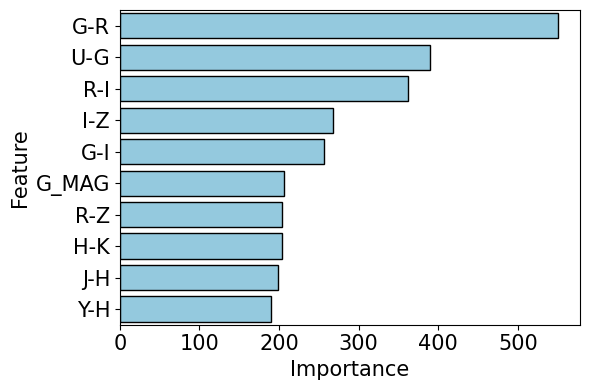

In [36]:
stack_impor=np.stack([list(feature_importances_1),list(feature_importances_2)
                      ,list(feature_importances_3),list(feature_importances_4),list(feature_importances_5)])
average=np.mean(stack_impor, axis = 0)

df_feature_importances = pd.DataFrame({
    'Feature': feature_names,
    'Importance': average
}).sort_values('Importance', ascending=False).head(10)
plt.figure(figsize=(6, 4))
sns.barplot(x="Importance", y="Feature", data=df_feature_importances,color='skyblue',edgecolor='black')
#plt.title('Feature Importances')
plt.xlabel('Importance',fontsize=15)
plt.ylabel('Feature',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.tight_layout()
plt.savefig('LGBM-Average Feature Importance',dpi=500, bbox_inches="tight")

In [58]:
#Saving the five models

from joblib import dump, load
dump(clf_1.best_estimator_, "LGBM_model_1.joblib")
dump(clf_2.best_estimator_, "LGBM_model_2.joblib")
dump(clf_3.best_estimator_, "LGBM_model_3.joblib")
dump(clf_4.best_estimator_, "LGBM_model_4.joblib")
dump(clf_5.best_estimator_, "LGBM_model_5.joblib")

['LGBM_model_5.joblib']

In [139]:
#Calculate average and stddev metrics among the five samples for the test set

f1_scores = [f1_1, f1_2, f1_3, f1_4, f1_5]
accuracy_scores = [accuracy_1, accuracy_2, accuracy_3, accuracy_4, accuracy_5]
precision_scores = [precision_1, precision_2, precision_3, precision_4, precision_5]
recall_scores = [recall_1, recall_2, recall_3, recall_4, recall_5]

def print_stats(metric_name, scores):
    scores = [round(score, 4) for score in scores]  
    mean_score = np.mean(scores)
    std_dev = np.std(scores)
    print(f'{metric_name}\nLGBM: Mean={mean_score:.4f}, Std Dev={std_dev:.4f}')

print('F1-SCORE')
print_stats('F1-SCORE', f1_scores)

print('\nAccuracy')
print_stats('Accuracy', accuracy_scores)

print('\nPrecision')
print_stats('Precision', precision_scores)

print('\nRecall')
print_stats('Recall', recall_scores)

F1-SCORE
F1-SCORE
LGBM: Mean=0.8249, Std Dev=0.0090

Accuracy
Accuracy
LGBM: Mean=0.8291, Std Dev=0.0098

Precision
Precision
LGBM: Mean=0.8459, Std Dev=0.0164

Recall
Recall
LGBM: Mean=0.8052, Std Dev=0.0107


In [ ]:
#Calculate average and stddev metrics among the five samples for the validation set

f1_scores = [clf_1.cv_results_['mean_test_f1'][clf_2.best_index_], clf_2.cv_results_['mean_test_f1'][clf_2.best_index_], clf_3.cv_results_['mean_test_f1'][clf_3.best_index_], clf_4.cv_results_['mean_test_f1'][clf_4.best_index_], clf_5.cv_results_['mean_test_f1'][clf_5.best_index_]]
accuracy_scores = [clf_1.cv_results_['mean_test_accuracy'][clf_2.best_index_], clf_2.cv_results_['mean_test_accuracy'][clf_2.best_index_], clf_3.cv_results_['mean_test_accuracy'][clf_3.best_index_], clf_4.cv_results_['mean_test_accuracy'][clf_4.best_index_], clf_5.cv_results_['mean_test_accuracy'][clf_5.best_index_]]
precision_scores = [clf_1.cv_results_['mean_test_precision'][clf_2.best_index_], clf_2.cv_results_['mean_test_precision'][clf_2.best_index_], clf_3.cv_results_['mean_test_precision'][clf_3.best_index_], clf_4.cv_results_['mean_test_precision'][clf_4.best_index_], clf_5.cv_results_['mean_test_precision'][clf_5.best_index_]]
recall_scores = [clf_1.cv_results_['mean_test_recall'][clf_2.best_index_], clf_2.cv_results_['mean_test_recall'][clf_2.best_index_], clf_3.cv_results_['mean_test_recall'][clf_3.best_index_], clf_4.cv_results_['mean_test_recall'][clf_4.best_index_], clf_5.cv_results_['mean_test_recall'][clf_5.best_index_]]

def print_stats(metric_name, scores):
    scores = [round(score, 4) for score in scores]  
    mean_score = np.mean(scores)
    std_dev = np.std(scores)
    print(f'{metric_name}\nLGBM: Mean={mean_score:.4f}, Std Dev={std_dev:.4f}')

print('F1-SCORE')
print_stats('F1-SCORE', f1_scores)

print('\nAccuracy')
print_stats('Accuracy', accuracy_scores)

print('\nPrecision')
print_stats('Precision', precision_scores)

print('\nRecall')
print_stats('Recall', recall_scores)